<center>
<div class="alert alert-block alert-info">
<b>CRM(Customer Relationship Management) Analytics</b> </div></center>


<img src="https://store.outrightcrm.com/wp-content/uploads/2023/05/Why-CRM-Should-be-an-Integral-Business-Component-01.png"
 alt="Insurance "
 style="display: block; margin: auto;">

<center>
<div class="alert alert-block alert-info">
<b>What are The CRM(Customer Relationship Management) Analytics?</b> </div></center>

   Analytical CRM is a subset of CRM in which a company collects data about its customer interactions, to increase customer satisfaction and customer retention rates. Analytical CRM is a behind-the-scenes process; the client is not aware of the capture and analysis of their actions and interactions with the company.<br>
   Companies may forecast consumer behavior and recommend goods to which they are more likely to respond better based on the information collected about customer behaviors, experiences, and the end effects of these experiences.<br>
   Analytical CRM is an essential part of managing customer relations. Analytical CRM accumulates and analyzes consumer data of various kinds, including:<br>
* Sales data: purchase and return history, brand preferences, etc.
* Financial data: payment and credit history, including payment type, credit scores, etc.
* Marketing data: customer response rates to marketing campaigns, customer satisfaction data, retention data, etc.

<center>
<div class="alert alert-block alert-info">
<b>About The Project process</b> </div></center>

Hello, I am going to realise a project about CRM analytics in this project. The Steps of project, Firstly, I am going to make changes to the dataset to apply the RFM . After I prepared the dataset, I am going to work on RFM 

<center>
<div class="alert alert-block alert-info">
<b>Explanation of columns</b> </div></center>

- InvoiceNo: A unique identifier for each invoice or transaction. It allows you to track individual sales.

- StockCode: A unique identifier for each product or item. This code helps in identifying and managing inventory.

- Description: A textual description of the product or item being purchased.

- Quantity: The number of units of the product purchased in that transaction.

- InvoiceDate: The date and time when the transaction occurred. This can be useful for time-based analysis.

- UnitPrice: The price per unit of the product. This is used to calculate the total cost of the items purchased.

- CustomerID: A unique identifier for each customer. It helps in tracking customer transactions and behaviors.

- Country: The country where the customer is located. This can be useful for geographic analysis and segmentation.

# Import Laibraries


In [774]:
# Data manipulation and analysis libraries
import pandas as pd
import numpy as np
import datetime as dt

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify # map for rfm 

# Data scaling and preparation
from sklearn.preprocessing import StandardScaler

# Clustering libraries
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Dimensionality reduction libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer


# Load Data 

In [775]:
df=pd.read_csv("E:\\Epsilon Ai\\Omar Hamad\\Final Poject\\Online Retail.csv")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [776]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# EDA 

In [777]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Shape of Data

In [778]:
print("Data contains ",df.shape[0],"'row' and ",df.shape[1],"'column'")


Data contains  541909 'row' and  8 'column'


#### Duplicated

In [779]:
num_duplicated_rows = df.duplicated().sum()
print("Count of Duplicated rows is :",num_duplicated_rows)

Count of Duplicated rows is : 5268


#### Null Values 

In [780]:
flag=0
for col in df.columns:
    if(df[col].isnull().sum()>0):
        flag+=1
        print(f"Count of Null Values in {col.ljust(20)}: {df[col].isnull().sum()}")
       
        
print("_______________________________________________")
print ("There are ",flag,"col conatin Null values")

Count of Null Values in Description         : 1454
Count of Null Values in CustomerID          : 135080
_______________________________________________
There are  2 col conatin Null values


In [781]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [782]:
# Number of Customer in the dataset.
print("The number of customer in the dataset:", df["CustomerID"].nunique() ) 
print("_______________________________________________")

# Number of Invoice in the dataset.
print("The number of invoice in the dataset:", df["InvoiceNo"].nunique())
print("_______________________________________________")

# Total number of products sold in the dataset
print("The sum of product in the dataset:", df["Quantity"].sum())
print("_______________________________________________")

# Total price in the dataset
total_price= ((df["Quantity"] * df["UnitPrice"]).sum()).astype(int)
print("The sum of price in the dataset:", total_price)
print("_______________________________________________")

# Total number of product in the dataset.
print("the sum of product in the dataset:", df["Description"].count(),)


The number of customer in the dataset: 4372
_______________________________________________
The number of invoice in the dataset: 25900
_______________________________________________
The sum of product in the dataset: 5176450
_______________________________________________
The sum of price in the dataset: 9747747
_______________________________________________
the sum of product in the dataset: 540455


In [783]:
# Dataset ordered from highest price to lowest price
df.sort_values(by = "UnitPrice", ascending  = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom


- There are negative values in the column of Quantity and nan values in the column of Customer ID. 


In [784]:
# Dataset ordered from lowest price to highest price
df.sort_values(by = "UnitPrice", ascending  = True).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
40984,539750,22652,TRAVEL SEWING KIT,1,2010-12-21 15:40:00,0.00,NaN,United Kingdom
52217,540696,84562A,NaN,1,2011-01-11 09:14:00,0.00,NaN,United Kingdom
52262,540699,POST,NaN,1000,2011-01-11 09:32:00,0.00,NaN,United Kingdom


- There are negative values in the column of UnitPrice. I will clear them.
- There are 0.0 in column UnitPrice and value in Description and Quantity 

# Data PreProcessing 

### Fix null and negative values ¶

In [785]:
df.dropna(inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [786]:
# turns into datatime because i can easy extract informtion
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [787]:
data =df.copy() # for analysis , to know reason for "c" in InvoiceNo 

In [788]:
# Values starting with 'C'
df[df["InvoiceNo"].str.contains("C", na = False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


- We still have negative values in the Quantity section is invoices that start with C because these invoices are return.


In [789]:
print("the df of shape Before Cleaning : ",df.shape)  
print("_______________________________________________")

df= df[~df["InvoiceNo"].str.contains("C", na = False)] # clear row contains "c"
# df = df[df["InvoiceNo"].apply(lambda x: "C" not in str(x))] # another way 

print("the df of shape After Cleaning : ",df.shape) 


the df of shape Before Cleaning :  (406829, 8)
_______________________________________________
the df of shape After Cleaning :  (397924, 8)


- some rows had deletied because the column InvoiceNo contains 'C'

### Total Price ¶
calculate total price and add column in DataFrame

In [790]:
df[df['UnitPrice']==0.0].count() # little rows , so i can removed 

InvoiceNo      40
StockCode      40
Description    40
Quantity       40
InvoiceDate    40
UnitPrice      40
CustomerID     40
Country        40
dtype: int64

In [791]:
df=df[df["UnitPrice"] > 0.0] 


In [792]:
df["Total_Price"] = df["Quantity"] * df['UnitPrice']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Customer DataFrame

In [793]:
customer_df = df.sort_values('InvoiceDate').groupby('CustomerID').agg(
    {
        'InvoiceDate': ['first', 'last'],
        'InvoiceNo': 'nunique',
        'Quantity': 'sum',
        'UnitPrice': 'sum',
    }
)

customer_df.columns = ['FirstPurchaseDate', 'LastPurchaseDate',
                       'TotalOrders', 'TotalQuantity', 'TotalPurchasePrice']


customer_df['DaysGap'] = (
    customer_df['LastPurchaseDate'] - customer_df['FirstPurchaseDate']).dt.days + 1
# customer_df = customer_df[customer_df['DaysToDate'] > 1].copy()


customer_df.head()

,FirstPurchaseDate,LastPurchaseDate,TotalOrders,TotalQuantity,TotalPurchasePrice,DaysGap
CustomerID,,,,,,
12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,1,74215,1.04,1
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,7,2458,481.21,366
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,4,2341,178.71,283
12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,1,631,605.10,1
12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,1,197,65.30,1


In [794]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FirstPurchaseDate   4338 non-null   datetime64[ns]
 1   LastPurchaseDate    4338 non-null   datetime64[ns]
 2   TotalOrders         4338 non-null   int64         
 3   TotalQuantity       4338 non-null   int64         
 4   TotalPurchasePrice  4338 non-null   float64       
 5   DaysGap             4338 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 237.2 KB


### Dataset Column Descriptions

1. **FirstPurchaseDate**: The date of the customer's first purchase. This indicates when the customer made their initial transaction.

2. **LastPurchaseDate**: The date of the customer's most recent purchase. This shows when the customer made their latest transaction.

3. **TotalOrders**: The total number of orders placed by the customer. This counts all individual transactions made by the customer.

4. **TotalQuantity**: The total quantity of items purchased by the customer. This is the sum of all items bought across all transactions.

5. **AveragePurchasePrice**: The average price of items purchased by the customer. It is calculated as the total expenditure divided by the total quantity of items bought.

6. **DaysGap**: The number of days between the first and last purchase made by the customer. It measures the time span of the customer’s purchasing activity.


# RFM 

<center>
<div class="alert alert-block alert-info">
<b>What is the What Is Recency, Frequency, Monetary Value (RFM)?</b> </div></center>


<img src="https://hivemarketingcloud.com/media/zphnp5zi/rfm-analysis-blog-graphic-01.png" 
alt="RFM Analysis"  width =1000 height =500
style="display: block; margin: auto;">

RFM (Recency, Frequency, Monetary) analysis is a marketing technique used to segment customers based on their purchasing behavior. It helps businesses understand and categorize their customers according to their buying habits. Here's a breakdown of the RFM components:.<br>
RFM is then used to identify a company’s or an organization’s best customers by measuring and analyzing spending habits to improve low-scoring customers and maintain high-scoring ones.

**Understanding Recency, Frequency, Monetary Value**<br>
1. Recency (R): How recently a customer made a purchase.
2. Frequency (F): How often a customer makes a purchase.
3. Monetary (M): How much money a customer spends.

**Steps for RFM Analysis**
1. Prepare the Data: Ensure columns like CustomerID, InvoiceDate, and TotalAmount are available.
2. Calculate Recency: The number of days since the last purchase.
3. Calculate Frequency: The total number of purchases per customer.
4. Calculate Monetary: The total amount spent by each customer.
5. Score RFM: Assign scores (1 to 5) to each RFM component.
6. Segment Customers: Group customers based on their RFM scores.
<center>
<div class="alert alert-block alert-info">
<b>About The Process Of This Section</b> </div></center>

In this section, I am going to prepare the dataset for RFM and segment the dataset I prepared.

In [795]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [796]:
# For Recency 
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [797]:
today_date = dt.datetime(2011,12,11)


In [798]:
rfm = df.groupby("CustomerID").agg({"InvoiceDate" : lambda InvoiceDate: (today_date - InvoiceDate.max()).days, # Recency
                                "InvoiceNo" : lambda Invoice : Invoice.nunique(), # Frequency
                                "Total_Price" : lambda Total_Price: Total_Price.sum()}) # Monetary

In [799]:
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


## Segmentation
**Segmentation:** in data analysis refers to dividing a dataset into distinct groups based on shared characteristics or behaviors.    
           
**Recency_Score:** Measures how recently a customer made their last purchase. More recent purchases get a higher score.

**Frequency_Score:** Measures how often a customer makes purchases. More frequent buyers get a higher score.

**Monetary_Score:** Measures how much money a customer has spent. Higher spenders get a higher score.

These scores are used to categorize customers and analyze their purchasing behavior.

In [800]:
rfm["Recency_Score"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4, 3, 2, 1])  # بالعكس عشان اكبر قيمه لاطول مده 
rfm["Frequency_Score"] = pd.qcut(rfm["Frequency"].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
rfm["Monetary_Score"] = pd.qcut(rfm["Monetary"], 5, labels = [1, 2, 3, 4, 5])

In [801]:
rfm.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,3,7,4310.00,5,5,5
12348.0,76,4,1797.24,2,4,4
12349.0,19,1,1757.55,4,1,4
12350.0,311,1,334.40,1,1,2


In [802]:

rfm["RFM_Score"] = rfm["Recency_Score"].astype(str) + rfm["Frequency_Score"].astype(str) # str because it is description not value
rfm.head()
# i used Recency_Score and Frequency_Score because the money  is not useful 

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,11
12347.0,3,7,4310.00,5,5,5,55
12348.0,76,4,1797.24,2,4,4,24
12349.0,19,1,1757.55,4,1,4,41
12350.0,311,1,334.40,1,1,2,11


In [803]:
# Seg_map is customer group.
# r=> row 
# regex => regular expression
seg_map = {
    r'[1-2][1-2]' : 'hibernatig', 
    r'[1-2][3-4]' : 'at_Risk',
    r'[1-2]5' : 'cant-loose',
    r'3[1-2]' : 'about_to_sleep',
    r'33' : 'need_attention',
    r'[3-4][4-5]' : 'loyal_customers',
    r'41' : 'promising',
    r'51' : 'new_customers',
    r'[4-5][2-3]' : 'potential_loyalists',
    r'5[4-5]' : 'champions'}
rfm["Segment"] = rfm["RFM_Score"].replace(seg_map, regex = True)


* **Champions:** Buy often, spend the most, and purchase recently.
* **Loyal Customers:** Frequent buyers, recent, and high spenders.
* **Potential Loyalists:** Recent, multiple purchases, good spending.
* **Recent Customers:** Purchased recently but infrequently.
* **Promising:** Recent buyers with low spending.
* **Needs Attention:** Above average RFM, but not very recent.
* **About to Slip:** Below average RFM, at risk of being lost.
* **New Customers:** Recently started buying, infrequent, low spend.
* **At-Risk:** Previously frequent, high spenders, but haven’t bought recently.
* **Lost Customers:** Haven’t purchased in a long time, low spenders.
* **Can't Lose Them:** High spend, frequent buyers, but long inactive.
* **Hibernating:** Low frequency, low spend, last purchase was long ago.

In [804]:
rfm

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,11,hibernatig
12347.0,3,7,4310.00,5,5,5,55,champions
12348.0,76,4,1797.24,2,4,4,24,at_Risk
12349.0,19,1,1757.55,4,1,4,41,promising
12350.0,311,1,334.40,1,1,2,11,hibernatig
...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,12,hibernatig
18281.0,181,1,80.82,1,2,1,12,hibernatig
18282.0,8,2,178.05,5,3,1,53,potential_loyalists


<Figure size 600x400 with 0 Axes>

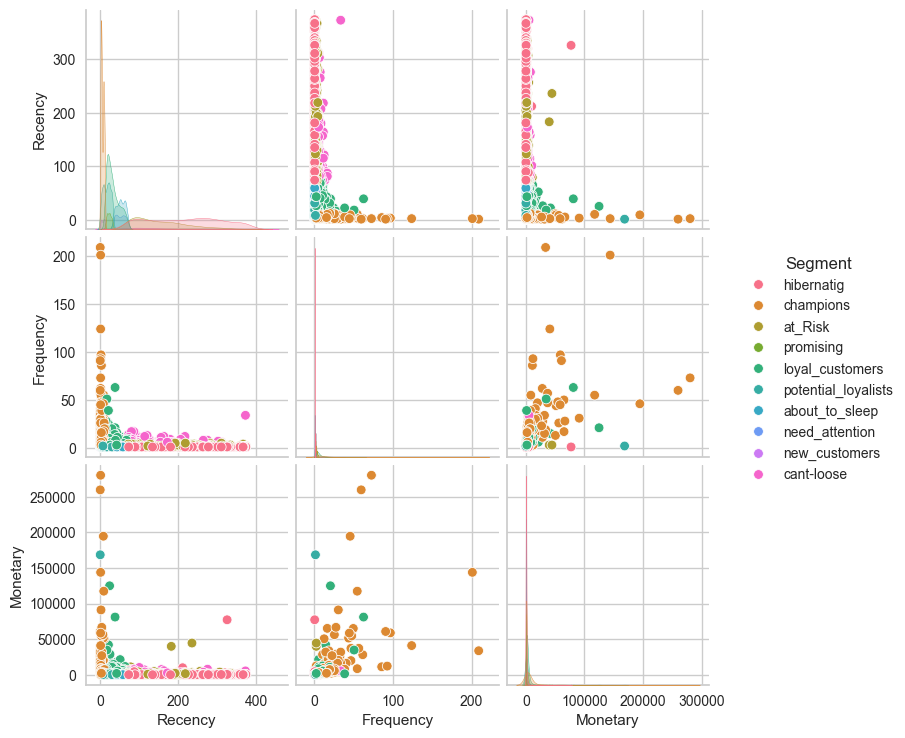

In [805]:
plt.figure(figsize=(6, 4))
sns.pairplot(rfm, hue = "Segment")

# Final DataFrame

**For Aanlysis**

In [806]:
# Assuming df, rfm, and customer_df are your DataFrames
merged_df = pd.merge(df, rfm, on="CustomerID", how="inner")
merged_df = pd.merge(merged_df, customer_df, on="CustomerID", how="inner")


In [807]:
merged_df.drop(columns=['InvoiceNo','StockCode','InvoiceDate','TotalPurchasePrice'],inplace=True)
merged_df

,Description,Quantity,UnitPrice,CustomerID,Country,Total_Price,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment,FirstPurchaseDate,LastPurchaseDate,TotalOrders,TotalQuantity,DaysGap
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,373,34,5391.21,1,5,5,15,cant-loose,2010-12-01 08:26:00,2010-12-02 15:27:00,34,1733,2
1,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,373,34,5391.21,1,5,5,15,cant-loose,2010-12-01 08:26:00,2010-12-02 15:27:00,34,1733,2
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,373,34,5391.21,1,5,5,15,cant-loose,2010-12-01 08:26:00,2010-12-02 15:27:00,34,1733,2
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,373,34,5391.21,1,5,5,15,cant-loose,2010-12-01 08:26:00,2010-12-02 15:27:00,34,1733,2
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,373,34,5391.21,1,5,5,15,cant-loose,2010-12-01 08:26:00,2010-12-02 15:27:00,34,1733,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397879,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20,1,4,862.81,5,4,3,54,champions,2011-08-18 15:44:00,2011-12-09 12:50:00,4,443,113
397880,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,1,4,862.81,5,4,3,54,champions,2011-08-18 15:44:00,2011-12-09 12:50:00,4,443,113
397881,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,1,4,862.81,5,4,3,54,champions,2011-08-18 15:44:00,2011-12-09 12:50:00,4,443,113
397882,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,1,4,862.81,5,4,3,54,champions,2011-08-18 15:44:00,2011-12-09 12:50:00,4,443,113


In [808]:
# Reordered columns
new_column_order = [
    'CustomerID', 'Country', 'Description', 'Quantity', 'UnitPrice', 
    'Total_Price', 'FirstPurchaseDate', 'LastPurchaseDate', 'TotalOrders', 
    'TotalQuantity', 'DaysGap', 'Recency', 'Frequency', 'Monetary', 
    'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'RFM_Score', 
    'Segment'
]

# Apply the new order
final_df= merged_df[new_column_order]


In [809]:
final_df.head()

,CustomerID,Country,Description,Quantity,UnitPrice,Total_Price,FirstPurchaseDate,LastPurchaseDate,TotalOrders,TotalQuantity,DaysGap,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
0,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,2010-12-02 15:27:00,34,1733,2,373,34,5391.21,1,5,5,15,cant-loose
1,17850.0,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,2010-12-02 15:27:00,34,1733,2,373,34,5391.21,1,5,5,15,cant-loose
2,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,2010-12-02 15:27:00,34,1733,2,373,34,5391.21,1,5,5,15,cant-loose
3,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,2010-12-02 15:27:00,34,1733,2,373,34,5391.21,1,5,5,15,cant-loose
4,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,2010-12-02 15:27:00,34,1733,2,373,34,5391.21,1,5,5,15,cant-loose


In [810]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         397884 non-null  float64       
 1   Country            397884 non-null  object        
 2   Description        397884 non-null  object        
 3   Quantity           397884 non-null  int64         
 4   UnitPrice          397884 non-null  float64       
 5   Total_Price        397884 non-null  float64       
 6   FirstPurchaseDate  397884 non-null  datetime64[ns]
 7   LastPurchaseDate   397884 non-null  datetime64[ns]
 8   TotalOrders        397884 non-null  int64         
 9   TotalQuantity      397884 non-null  int64         
 10  DaysGap            397884 non-null  int64         
 11  Recency            397884 non-null  int64         
 12  Frequency          397884 non-null  int64         
 13  Monetary           397884 non-null  float64 

In [811]:
final_df.isna().sum()

CustomerID           0
Country              0
Description          0
Quantity             0
UnitPrice            0
Total_Price          0
FirstPurchaseDate    0
LastPurchaseDate     0
TotalOrders          0
TotalQuantity        0
DaysGap              0
Recency              0
Frequency            0
Monetary             0
Recency_Score        0
Frequency_Score      0
Monetary_Score       0
RFM_Score            0
Segment              0
dtype: int64

# Analysis & Visualization 📊📉

* the most 10 products was selled

In [812]:
final_df.groupby("Description").agg({"Quantity":"sum"}).sort_values('Quantity',ascending=False).head(10)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725
ASSORTED COLOUR BIRD ORNAMENT,35362
PACK OF 72 RETROSPOT CAKE CASES,33693
POPCORN HOLDER,30931
RABBIT NIGHT LIGHT,27202


In [813]:
top_products = final_df.groupby("Description").agg({"Quantity": "sum"}).nlargest(10, 'Quantity')
fig = px.bar(
    top_products,
    y=top_products.index,
    x='Quantity',
    color=top_products.index,
    title="Top 10 Products by Quantity"
)
fig.update_layout(
    yaxis_title="Product",
    xaxis_title="Total Quantity"
)
fig.show()


C:\Users\Omar Shoieb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



* The Most 10 Product is worst

In [814]:
worst_product=final_df[final_df['Segment']=='hibernatig']['Description'].value_counts().nlargest(10)
worst_product

Description
WHITE HANGING HEART T-LIGHT HOLDER    130
REGENCY CAKESTAND 3 TIER              126
PARTY BUNTING                         103
POSTAGE                               102
ASSORTED COLOUR BIRD ORNAMENT          95
BAKING SET 9 PIECE RETROSPOT           91
SET OF 3 CAKE TINS PANTRY DESIGN       89
JAM MAKING SET WITH JARS               82
PACK OF 72 RETROSPOT CAKE CASES        76
JAM MAKING SET PRINTED                 74
Name: count, dtype: int64

In [815]:
worst_product=final_df[final_df['Segment']=='hibernatig']['Description'].value_counts().nlargest(10)
worst_product_df = worst_product.reset_index()
worst_product_df.columns = ['Description', 'Count']

plt.figure(figsize=(4, 4)) 
fig = px.bar(worst_product_df,y='Description',x='Count',color='Description',title="Worst 10 Products by Count")
fig.update_layout(yaxis_title="Product",xaxis_title="Total Count")
fig.show()


C:\Users\Omar Shoieb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Figure size 400x400 with 0 Axes>

* The Relationship between DaysGap and number of order filtered by CustomerID

In [816]:
top_customers = final_df.groupby(['CustomerID', 'DaysGap', 'TotalOrders']).size().reset_index(name='counts')

top_customers.sort_values(by='counts', ascending=False).head(10)



,CustomerID,DaysGap,TotalOrders,counts
4010,17841.0,372,124,7847
1879,14911.0,373,201,5675
1289,14096.0,98,17,5111
326,12748.0,373,209,4595
1661,14606.0,373,93,2700
2176,15311.0,374,91,2379
1689,14646.0,354,73,2076
562,13089.0,367,97,1818
690,13263.0,324,35,1677
1434,14298.0,353,44,1637


* The Relationship between DaysGap and Totla price filtered by CustomerID

In [817]:
top_10_customer=final_df[["CustomerID", 'Quantity', 'DaysGap', 'Total_Price']]
top_10_customer.groupby("CustomerID").sum().sort_values(by='Total_Price', ascending=False).head(10)


,Quantity,DaysGap,Total_Price
CustomerID,,,
14646.0,196915,734904,280206.02
18102.0,64124,158177,259657.30
17450.0,69993,121320,194550.79
16446.0,80997,615,168472.50
14911.0,80265,2116775,143825.06
12415.0,77374,224196,124914.53
14156.0,57885,506800,117379.63
17511.0,64549,357273,91062.38
16029.0,40208,81312,81024.84


* the Most Frequent Customer in Each Segment


In [818]:
customer_segment_counts = final_df.groupby(['Segment', 'CustomerID']).size().reset_index(name='Count')
most_frequent_customers = customer_segment_counts.loc[customer_segment_counts.groupby('Segment')['Count'].idxmax()]
most_frequent_customers

,Segment,CustomerID,Count
336,about_to_sleep,18022.0,191
831,at_Risk,17337.0,543
988,cant-loose,16745.0,357
1596,champions,17841.0,7847
1651,hibernatig,12378.0,219
2924,loyal_customers,14159.0,1204
3586,need_attention,14535.0,330
3740,new_customers,14093.0,105
3856,potential_loyalists,13521.0,436
4290,promising,14382.0,131


In [819]:
fig = px.bar(most_frequent_customers, y='Segment', x='Count', color='CustomerID',
    text='CustomerID',title="Most Frequent Customer in Each Segment")
fig.update_layout(yaxis_title="Segment",xaxis_title="Count",showlegend=True)
fig.show()

* The most 10 Country 

In [820]:
final_df.groupby("Country")[['Quantity', 'Total_Price']].sum().sort_values(by='Total_Price', ascending=False).head(10)

,Quantity,Total_Price
Country,,
United Kingdom,4256740,7308391.554
Netherlands,200361,285446.340
EIRE,140275,265545.900
Germany,119261,228867.140
France,111471,209024.050
Australia,83901,138521.310
Spain,27940,61577.110
Switzerland,30082,56443.950
Belgium,23237,41196.340


In [821]:
top_countries = final_df.groupby("Country")[['Quantity', 'Total_Price']].sum().sort_values(by='Total_Price', ascending=False).head(10)
fig = px.bar( top_countries,y=top_countries.index, x='Total_Price', 
             text='Quantity', color=top_countries.index,title="Top 10 Countries by Total Price and Quantity")
fig.update_layout(yaxis_title="Country",xaxis_title="Total Price", xaxis2=dict(title="Quantity", overlaying='x', side='top'))
fig.show()


C:\Users\Omar Shoieb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



* the Segment for 10 Country

In [822]:
top_10_countries = final_df['Country'].value_counts().nlargest(10).index
filtered_df = final_df[final_df['Country'].isin(top_10_countries)]

segment_country_counts = filtered_df.groupby(['Country', 'Segment']).size().unstack(fill_value=0)

segment_country_counts = segment_country_counts.loc[top_10_countries]
segment_country_counts


Segment,about_to_sleep,at_Risk,cant-loose,champions,hibernatig,loyal_customers,need_attention,new_customers,potential_loyalists,promising
Country,,,,,,,,,,
United Kingdom,8888,29361,7149,153288,19059,102019,10134,980,21664,1779
Germany,122,418,0,2488,1042,4219,36,69,579,67
France,155,175,24,3267,534,2935,446,33,709,63
EIRE,0,161,0,7075,0,0,0,0,0,0
Spain,273,216,0,234,229,1381,0,12,114,25
Netherlands,4,0,0,2076,48,116,95,0,20,0
Belgium,232,158,0,674,150,770,0,0,47,0
Switzerland,317,392,0,354,451,153,125,0,49,0
Portugal,100,31,0,497,234,371,28,0,187,14


### RFM 
* Segmentation Summary

In [823]:
final_df[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "sum", "count"])

Recency                   Frequency                   \
                           mean      sum   count       mean      sum   count   
Segment                                                                        
about_to_sleep        51.750283   548553   10600   1.266038    13420   10600   
at_Risk              143.683774  4571874   31819   3.180992   101216   31819   
cant-loose           136.916353   982101    7173   9.691482    69517    7173   
champions              5.457847   934378  171199  36.272151  6209756  171199   
hibernatig           209.203921  4855623   23210   1.167083    27088   23210   
loyal_customers       31.470884  3633943  115470   8.398788   969808  115470   
need_attention        52.177904   578079   11079   2.470440    27370   11079   
new_customers          7.939446     9178    1156   1.000000     1156    1156   
potential_loyalists   16.746063   401939   24002   2.201858    52849   24002   
promising             23.275735    50648    2176   1.000000     2176    2176   

                         Monetary                        
                             mean           sum   count  
Segment                                                  
about_to_sleep         728.027158  7.717088e+06   10600  
at_Risk               1384.278260  4.404635e+07   31819  
cant-loose            3086.687019  2.214081e+07    7173  
champions            22869.951133  3.915313e+09  171199  
hibernatig             681.229809  1.581134e+07   23210  
loyal_customers       4641.244456  5.359245e+08  115470  
need_attention        1414.142484  1.566728e+07   11079  
new_customers          358.583486  4.145225e+05    1156  
potential_loyalists   1022.056842  2.453141e+07   24002  
promising              444.670731  9.676035e+05    2176

### RFM Segmentation 

In [824]:
segments = final_df['Segment'].value_counts()
fig = px.bar(
     x = segments.index,
     y = segments.values,
     color = segments.index,
     text = segments.values,
     title = "RFM Segments"
)
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)
fig.show()

C:\Users\Omar Shoieb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [825]:
!pip install squarify



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: C:\Users\Omar Shoieb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Map of Segmentation 

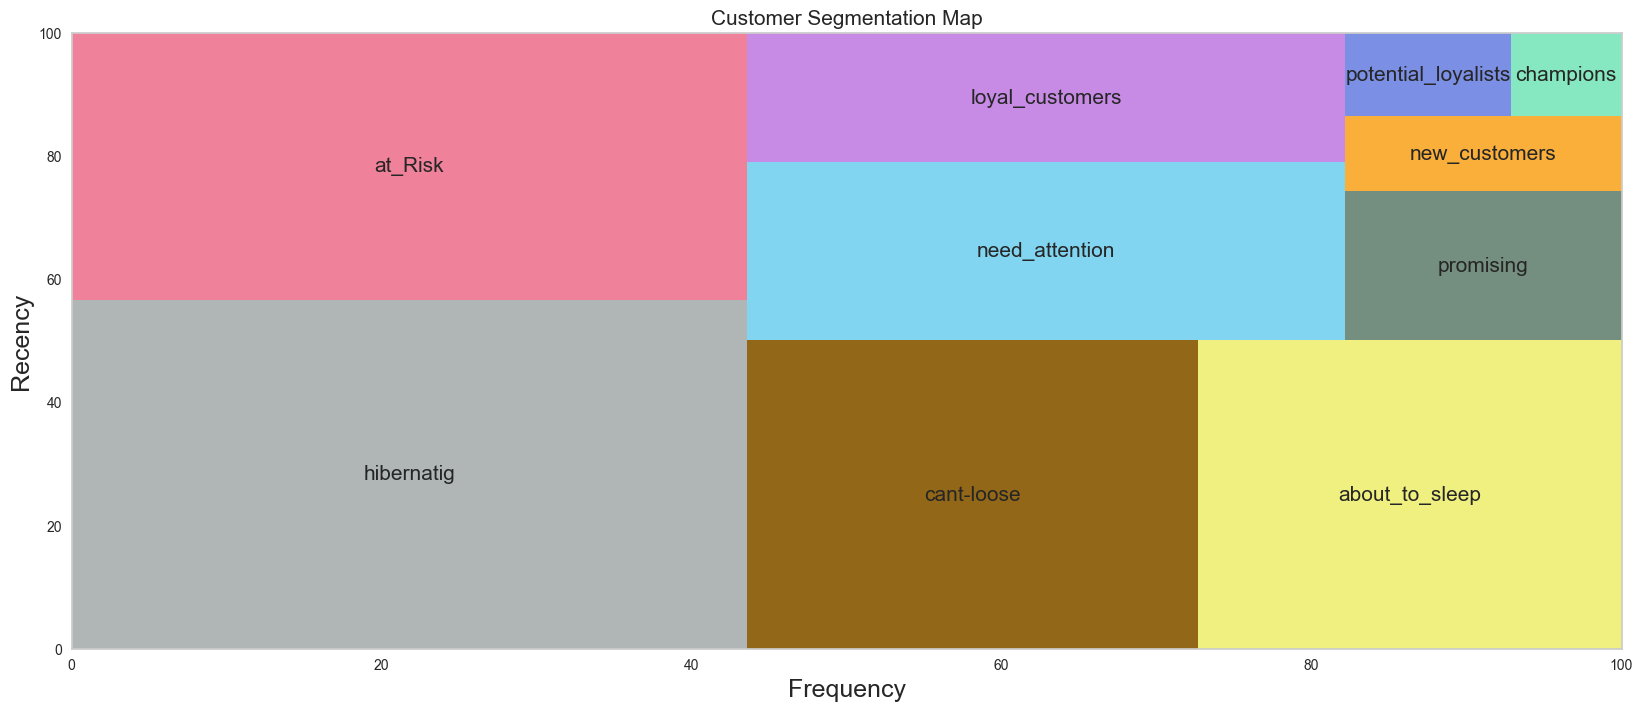

In [826]:
import squarify
segments = rfm["Segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 8)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=["#AFB6B5","#F0819A","#926717","#F0F081","#81D5F0","#C78BE5","#748E80","#FAAF3A","#7B8FE4","#86E8C0",],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=15)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

# Data Preparation ¶

In [827]:
predict_df = pd.merge(customer_df, rfm, on="CustomerID", how="inner")
predict_df.head()


,FirstPurchaseDate,LastPurchaseDate,TotalOrders,TotalQuantity,TotalPurchasePrice,DaysGap,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
CustomerID,,,,,,,,,,,,,,
12346.0,2011-01-18 10:01:00,2011-01-18 10:01:00,1,74215,1.04,1,326,1,77183.60,1,1,5,11,hibernatig
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00,7,2458,481.21,366,3,7,4310.00,5,5,5,55,champions
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00,4,2341,178.71,283,76,4,1797.24,2,4,4,24,at_Risk
12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,1,631,605.10,1,19,1,1757.55,4,1,4,41,promising
12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,1,197,65.30,1,311,1,334.40,1,1,2,11,hibernatig


In [828]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FirstPurchaseDate   4338 non-null   datetime64[ns]
 1   LastPurchaseDate    4338 non-null   datetime64[ns]
 2   TotalOrders         4338 non-null   int64         
 3   TotalQuantity       4338 non-null   int64         
 4   TotalPurchasePrice  4338 non-null   float64       
 5   DaysGap             4338 non-null   int64         
 6   Recency             4338 non-null   int64         
 7   Frequency           4338 non-null   int64         
 8   Monetary            4338 non-null   float64       
 9   Recency_Score       4338 non-null   category      
 10  Frequency_Score     4338 non-null   category      
 11  Monetary_Score      4338 non-null   category      
 12  RFM_Score           4338 non-null   object        
 13  Segment             4338 non-null   object  

In [829]:
# to easily for user in deployment
predict_df['FirstPurchaseDate'] = predict_df['FirstPurchaseDate'].dt.strftime('%Y-%m-%d')
predict_df['LastPurchaseDate'] = predict_df['LastPurchaseDate'].dt.strftime('%Y-%m-%d')


### Check outliers in Predict RFM 
**I will check in RFM only because variance in columns that i  will use them in prediction**

Text(0.5, 0, 'Attributes')

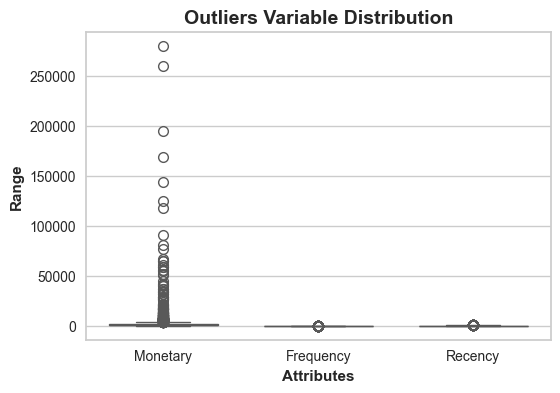

In [830]:
attributes = ['Monetary', 'Frequency', 'Recency']
plt.rcParams['figure.figsize'] = [6, 4]
sns.boxplot(data=predict_df[attributes], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Range", fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')

In [831]:
# Removing (statistical) outliers for Monetary
Q1 = predict_df.Monetary.quantile(0.01)  
Q3 = predict_df.Monetary.quantile(0.99)  
IQR = Q3 - Q1
predict_df = predict_df[(predict_df.Monetary >= Q1 - 1.5*IQR) & (predict_df.Monetary <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = predict_df.Recency.quantile(0.01)  
Q3 = predict_df.Recency.quantile(0.99)  
IQR = Q3 - Q1
predict_df = predict_df[(predict_df.Recency >= Q1 - 1.5*IQR) & (predict_df.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = predict_df.Frequency.quantile(0.01) 
Q3 = predict_df.Frequency.quantile(0.99)  
IQR = Q3 - Q1
predict_df = predict_df[(predict_df.Frequency >= Q1 - 1.5*IQR) & (predict_df.Frequency <= Q3 + 1.5*IQR)]


Text(0.5, 0, 'Attributes')

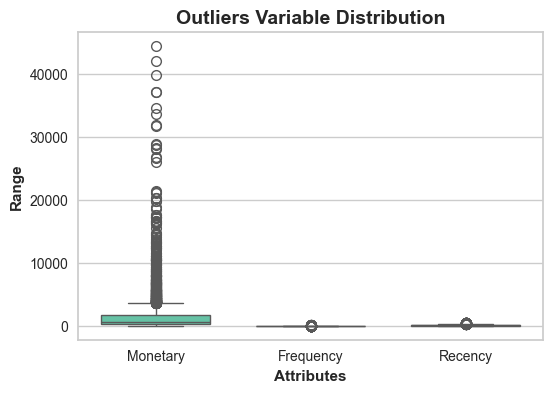

In [832]:
attributes = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [6,4]
sns.boxplot(data = predict_df[attributes], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')


### Check Skewed

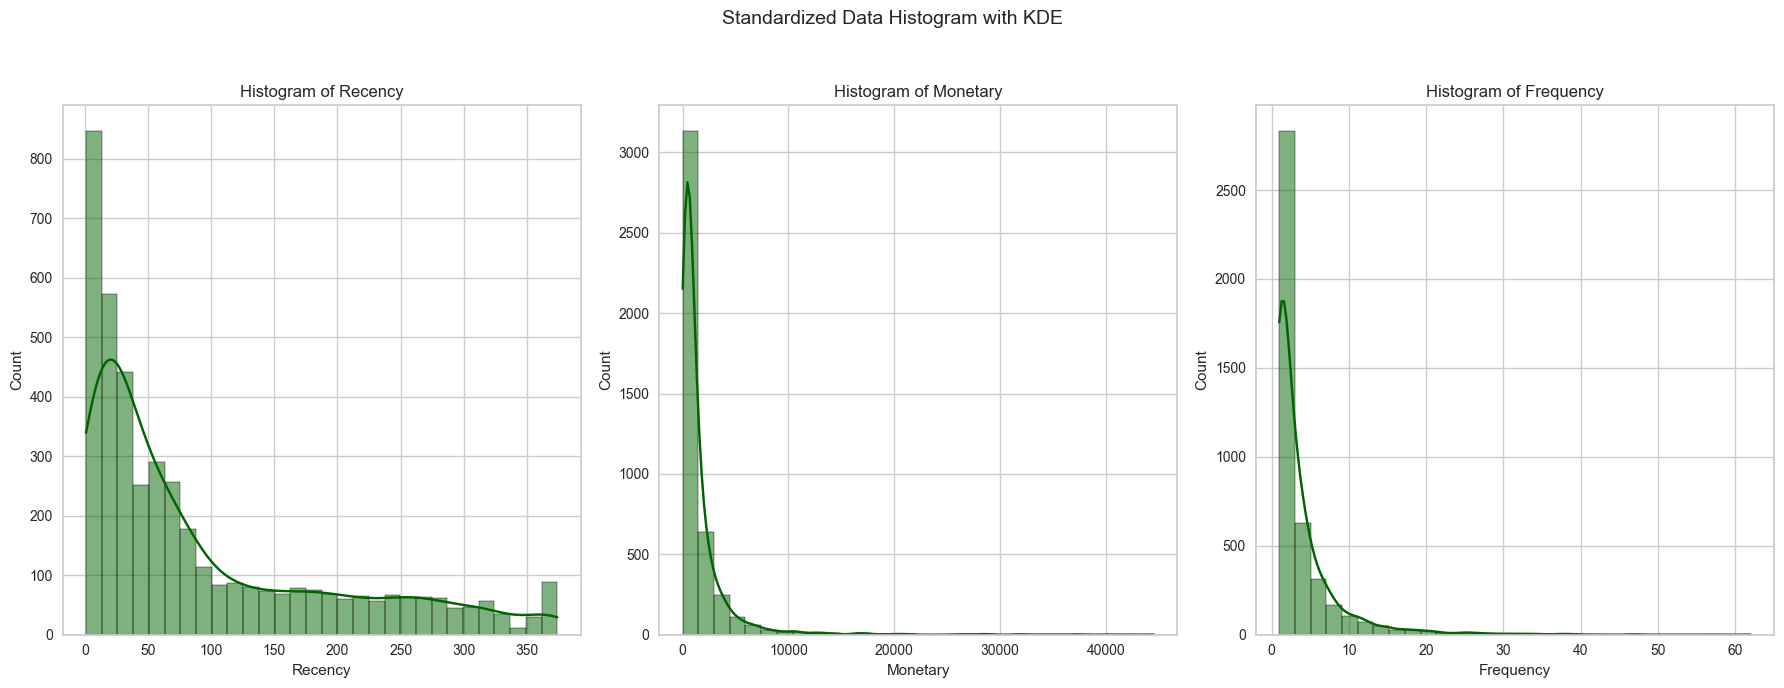

In [833]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
fig.suptitle("Standardized Data Histogram with KDE", size=14)

for idx, feature in enumerate(["Recency", "Monetary", "Frequency"]):
    sns.histplot(predict_df[feature], kde=True, ax=axes[idx], color='darkgreen', bins=30)
    axes[idx].set_title(f"Histogram of {feature}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [834]:
from sklearn.preprocessing import StandardScaler

# StandardScaler => يحول البيانات إلى توزيع بمتوسط 0 وانحراف معياري 1
scaler = StandardScaler()

# تحويل البيانات
predict_df[['Recency', 'Frequency', 'Monetary', 'DaysGap']] = scaler.fit_transform(
    predict_df[['Recency', 'Frequency', 'Monetary', 'DaysGap']]
)
predict_df.head()

,FirstPurchaseDate,LastPurchaseDate,TotalOrders,TotalQuantity,TotalPurchasePrice,DaysGap,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
CustomerID,,,,,,,,,,,,,,
12347.0,2010-12-07,2011-12-07,7,2458,481.21,1.793370,-0.904533,0.617394,0.937133,5,5,5,55,champions
12348.0,2010-12-16,2011-09-25,4,2341,178.71,1.161695,-0.174637,0.011608,0.083905,2,4,4,24,at_Risk
12349.0,2011-11-21,2011-11-21,1,631,605.10,-0.984479,-0.744556,-0.594177,0.070428,4,1,4,41,promising
12350.0,2011-02-02,2011-02-02,1,197,65.30,-0.984479,2.175030,-0.594177,-0.412815,1,1,2,11,hibernatig
12352.0,2011-02-16,2011-11-03,8,536,1354.11,0.994263,-0.564582,0.819323,0.324584,3,5,5,35,loyal_customers


# Building the Model

## K-Means

In [835]:
from sklearn.cluster import KMeans

# Specify the new columns to use for clustering
X = predict_df[['Recency', 'Monetary', 'Frequency']]

kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the KMeans model and predict clusters
predict_df['Cluster'] = kmeans.fit_predict(X)


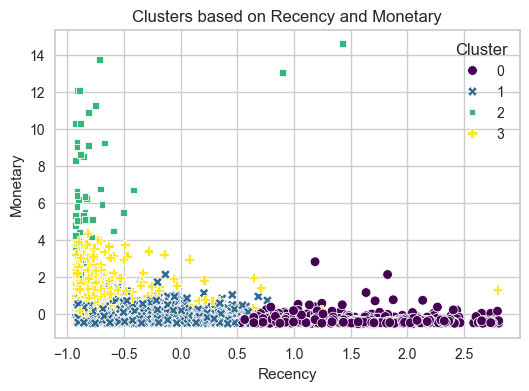

<Figure size 600x400 with 0 Axes>

In [836]:
sns.scatterplot(data=predict_df, x="Recency", y="Monetary", 
                hue="Cluster", palette="viridis", style=predict_df['Cluster'])

plt.title("Clusters based on Recency and Monetary")
plt.figure(figsize=(6, 4)) 
plt.show()


**Elbow for K-Means**

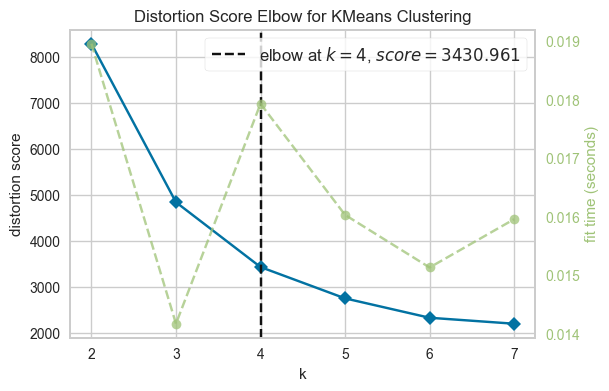

<Figure size 400x300 with 0 Axes>

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [837]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,8))
elbow.fit(X)
plt.figure(figsize=(4, 3))
elbow.show()


**Silhouette for K-Means**

In [838]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45880594180114614
For n_clusters=3, the silhouette score is 0.5423158820050109
For n_clusters=4, the silhouette score is 0.5485685303473703
For n_clusters=5, the silhouette score is 0.4864894620350245
For n_clusters=6, the silhouette score is 0.4520710572091977
For n_clusters=7, the silhouette score is 0.4522246924165163
For n_clusters=8, the silhouette score is 0.43761818599582414


In [839]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans = KMeans(n_clusters=4)  
kmeans_labels = kmeans.fit_predict(X)

kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X, kmeans_labels)
kmeans_inertia = kmeans.inertia_

print(f"K-Means: Silhouette Score = {kmeans_silhouette:.3f}, Davies-Bouldin Index = {kmeans_davies_bouldin:.3f}, Inertia = {kmeans_inertia:.3f}")


K-Means: Silhouette Score = 0.543, Davies-Bouldin Index = 0.717, Inertia = 3430.963


**PCA & t-SNE for K-Means**

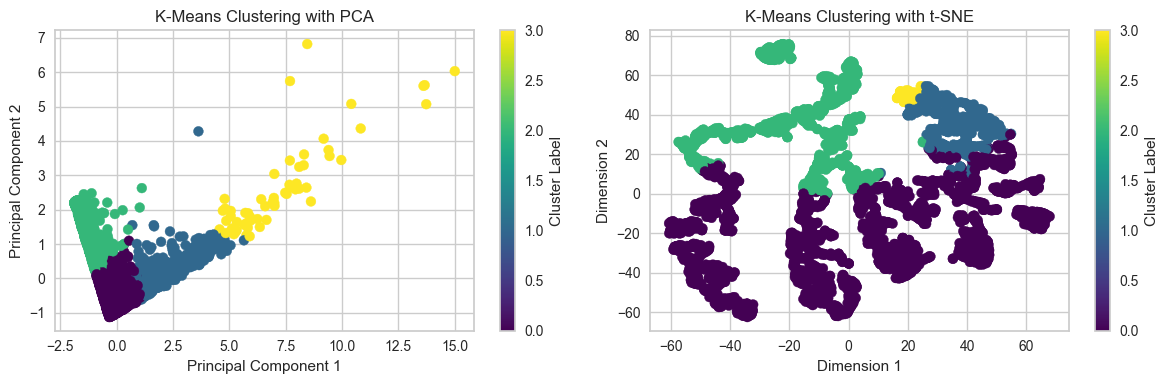

In [840]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans_labels = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PCA
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axes[0].set(title='K-Means Clustering with PCA', xlabel='Principal Component 1', ylabel='Principal Component 2')
plt.colorbar(axes[0].collections[0], ax=axes[0], label='Cluster Label')

# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axes[1].set(title='K-Means Clustering with t-SNE', xlabel='Dimension 1', ylabel='Dimension 2')
plt.colorbar(axes[1].collections[0], ax=axes[1], label='Cluster Label')

plt.tight_layout()
plt.show()


## Hierarchical Clustering


In [841]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
num_clusters = 3

clusters = fcluster(linkage(X, method='ward'), num_clusters, criterion='maxclust')

predict_df['Cluster'] = clusters

**Dendrogram for Hierarchical**

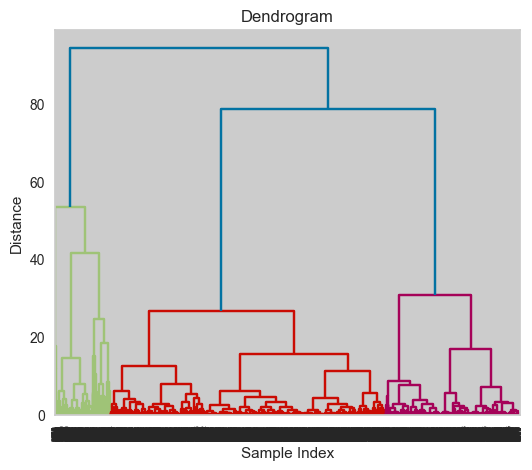

In [842]:
plt.figure(figsize=(6, 5))
dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


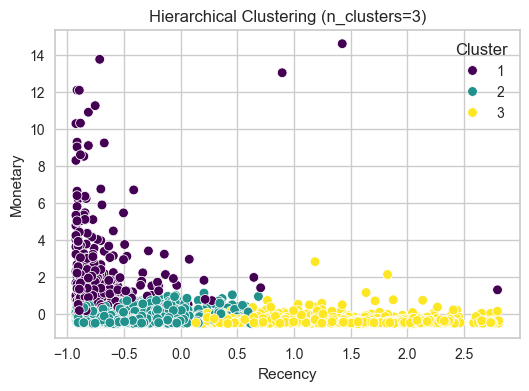

In [843]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=predict_df, x="Recency",  y="Monetary",  hue="Cluster",palette="viridis")
plt.title(f"Hierarchical Clustering (n_clusters={num_clusters})")
plt.show()

**Hierarchical Evaluation**

In [844]:

num_clusters = 3
hierarchical_labels = fcluster(linkage(X, method='ward'), num_clusters, criterion='maxclust')

hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(X, hierarchical_labels)

print(f"Hierarchical Clustering: Silhouette Score = {hierarchical_silhouette:.3f}, Davies-Bouldin Index = {hierarchical_davies_bouldin:.3f}")


Hierarchical Clustering: Silhouette Score = 0.502, Davies-Bouldin Index = 0.799


**PCA & t-SNE for Hierarchical**

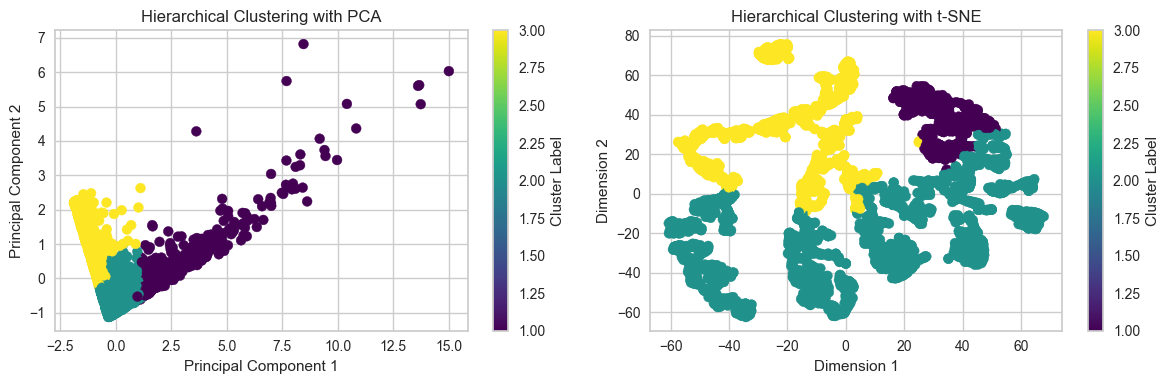

In [845]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PCA
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
axes[0].set(title='Hierarchical Clustering with PCA', xlabel='Principal Component 1', ylabel='Principal Component 2')
plt.colorbar(axes[0].collections[0], ax=axes[0], label='Cluster Label')

# t-SNE
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
axes[1].set(title='Hierarchical Clustering with t-SNE', xlabel='Dimension 1', ylabel='Dimension 2')
plt.colorbar(axes[1].collections[0], ax=axes[1], label='Cluster Label')

plt.tight_layout()
plt.show()


In [851]:
print(f"K-Means: Silhouette Score = {kmeans_silhouette:.3f}, Davies-Bouldin Index = {kmeans_davies_bouldin:.3f}, Inertia = {kmeans_inertia:.3f}")
print(f"Hierarchical Clustering: Silhouette Score = {hierarchical_silhouette:.3f}, Davies-Bouldin Index = {hierarchical_davies_bouldin:.3f}")


K-Means: Silhouette Score = 0.543, Davies-Bouldin Index = 0.717, Inertia = 3430.963
Hierarchical Clustering: Silhouette Score = 0.502, Davies-Bouldin Index = 0.799


### Final Model Evaluation Summary

Based on the evaluation metrics:

- **K-Means** shows the highest Silhouette Score, indicating the most well-defined clusters overall. It also has the lowest Davies-Bouldin Index, suggesting better cluster separation. However, K-Means has the highest Inertia, which might indicate that the clusters are not as compact.

- **Hierarchical Clustering** performs slightly worse than K-Means in terms of Silhouette Score and Davies-Bouldin Index, but still provides well-defined clusters. Note that Hierarchical Clustering does not have an Inertia metric as it's not applicable here.



#### Conclusion:
- **K-Means** is recommended for its overall better cluster definition and separation, despite its higher Inertia.
- **Hierarchical Clustering** provides a solid alternative with slightly less well-defined clusters but no Inertia metric.

This analysis highlights that K-Means offers the best clustering performance based on the provided metrics, while Hierarchical Clustering.



# Pickle Deployment

In [847]:
import pickle 

In [848]:
CRM_Prediction='crm_prediction.sav'
pickle.dump(kmeans,open(CRM_Prediction,'wb'))